In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


Data collection and processing

In [ ]:
car_dataset = pd.read_csv('/content/CarPrice.csv')

In [ ]:
car_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
car_dataset.shape

(205, 26)

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
car_dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

checking the distribution of categorical data

In [ ]:
print(car_dataset.fueltype.value_counts())
print(car_dataset.drivewheel.value_counts())
print(car_dataset.doornumber.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64


Encoding the categorical Data

In [ ]:
car_dataset.replace({'fueltype':{'gas':0,'diesel':1}},inplace=True)
car_dataset.replace({'drivewheel':{'fwd':0,'rwd':1,'4wd':2}},inplace=True)
car_dataset.replace({'doornumber':{'four':0,'two':1}},inplace=True)

In [ ]:
car_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,std,1,convertible,1,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,std,1,convertible,1,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,std,1,hatchback,1,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,std,0,sedan,0,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,std,0,sedan,2,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Splitting the data and target

In [ ]:
X=car_dataset.drop(['CarName','price'],axis=1)
Y=car_dataset['price']

In [ ]:
print(X)

     car_ID  symboling  fueltype aspiration  doornumber      carbody  \
0         1          3         0        std           1  convertible   
1         2          3         0        std           1  convertible   
2         3          1         0        std           1    hatchback   
3         4          2         0        std           0        sedan   
4         5          2         0        std           0        sedan   
..      ...        ...       ...        ...         ...          ...   
200     201         -1         0        std           0        sedan   
201     202         -1         0      turbo           0        sedan   
202     203         -1         0        std           0        sedan   
203     204         -1         1      turbo           0        sedan   
204     205         -1         0      turbo           0        sedan   

     drivewheel enginelocation  wheelbase  carlength  ...  cylindernumber  \
0             1          front       88.6      168.8  ... 

In [ ]:
print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


Splitting Training and Test data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

Model training
  1.Linear Regression

In [ ]:
X=X.apply(pd.to_numeric,errors='coerce')
Y=Y.apply(pd.to_numeric,errors='coerce')

In [ ]:
X.fillna(0,inplace=True)
Y.fillna(0,inplace=True)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [ ]:
clf=LinearRegression().fit(X_train,Y_train)

model evaluation

In [ ]:
training_data_prediction=clf.predict(X_train)

In [ ]:
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.8701097354944334


visualize the actual prices and predicted prices

<function matplotlib.pyplot.show(close=None, block=None)>

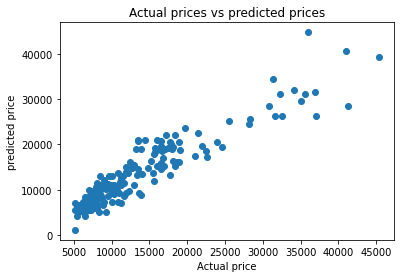

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual prices vs predicted prices")
plt.show

In [ ]:
# to predict the data
test_data_prediction=clf.predict(X_test)

In [ ]:
# R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8586408136209158


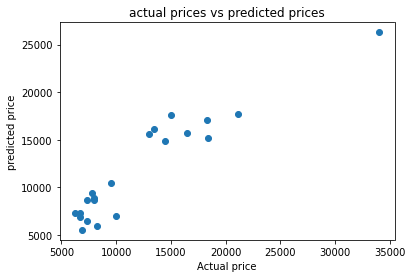

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()

2.Lasso Regression

In [ ]:
# loading the lasso regression model
lass_reg_model=Lasso()

In [ ]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model evaluation

In [ ]:
# predicting on training data
training_data_prediction=lass_reg_model.predict(X_train)

In [ ]:
# R squared Error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.8700972839551131


visualize the actual prices and predicted prices

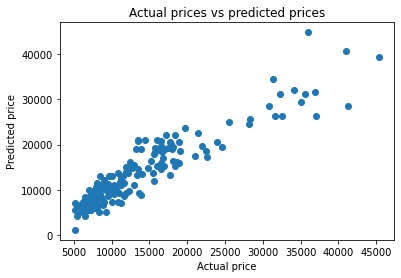

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs predicted prices")
plt.show()

In [ ]:
test_data_prediction=lass_reg_model.predict(X_test)

In [ ]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error:",error_score)

R squared Error: 0.8592142943703183


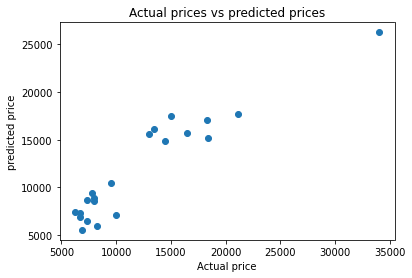

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual prices vs predicted prices")
plt.show()